## 회귀 분석

#### 단순 선형 회귀모델(Simple linear regression)
#### 키가 큰 아이를 낳기 위해서는 키 큰 배우자와 결혼?
- 연구자 : 칼톤(Galton) => 피어슨(Pearson)
- 진화론 반박을 위해 연구
- 가설 : 진화론에 따르면 키가 큰 아버지의 자직은 점점 커지고 키가 작은 아버지의 자식은 점점 작아 진다
- 피어슨 공식 : Y = 83.73 + 0.516 X , X는 아버지의 키
- 키가 큰 아버지의 자식은 아버지보다 작고 전체 평균보다는 크다
- 키가 작은 아버지의 자식은 아버지보다 크고 전체 평균보다는 작다
- 자식의 키는 아버지 키에 영향을 받는다 하더라도 결국 평균으로 돌아가려는 현상
- 아버지의 키와 아들의 키가 서로 연관성이 있다는 사실


#### 회귀분석
- 상관계수는 관계의 긴밀함을 수치적으로 계산
- 회귀분석은 한 변수의 변화에 따른 다른 변수의 값을 파악 할 수 있게 

In [3]:
month_incom <- c(100, 200, 300, 400)
month_out <- c(50, 100, 150, 200)
df <- data.frame(month_income,month_out)

In [4]:
df

month_income,month_out
100,50
200,100
300,150
400,200


- y(종속변수) = 0.5 * x(독립변수)
- 독립변수가 종속변수에 어떤 영향을 미치는 가 알아보는 식
- 정확한 함수식이 아닌 모든 데이터를 가장 만족시킬만한 최선의 함수식을 만들어야 함
- 수학의 함수로 표현 할 수 없는 그래프는 회귀모델이 될 수 없음 
- 공평하게 대부분의 점과 선이 최대한 떨어지지 않도록 선을 만들어야 함

In [5]:
#month_out = 0.5 * month_incom
lm(data = df, month_out~month_incom)


Call:
lm(formula = month_out ~ month_incom, data = df)

Coefficients:
(Intercept)  month_incom  
        0.0          0.5  


In [7]:
lm(data = mtcars, mpg~hp)


Call:
lm(formula = mpg ~ hp, data = mtcars)

Coefficients:
(Intercept)           hp  
   30.09886     -0.06823  


In [15]:
df <- data.frame(Work_hour=c(1:7),
                Total_pay=seq(10000,70000, by=10000))

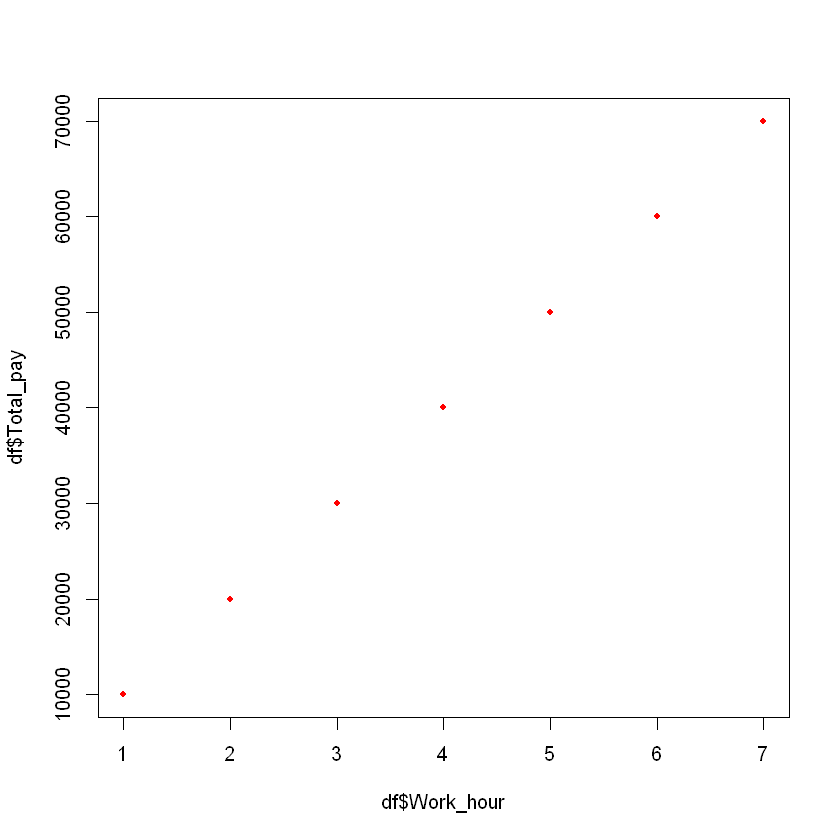

In [16]:
plot(data = df, df$Total_pay~df$Work_hour, pch=20, col='red')

In [17]:
# 절편 b0과 기울기 b1구하기 - lm(종속변수~독립변수)
lr <- lm(data = df, df$Total_pay ~ df$Work_hour)
lr


Call:
lm(formula = df$Total_pay ~ df$Work_hour, data = df)

Coefficients:
 (Intercept)  df$Work_hour  
     1.1e-11       1.0e+04  


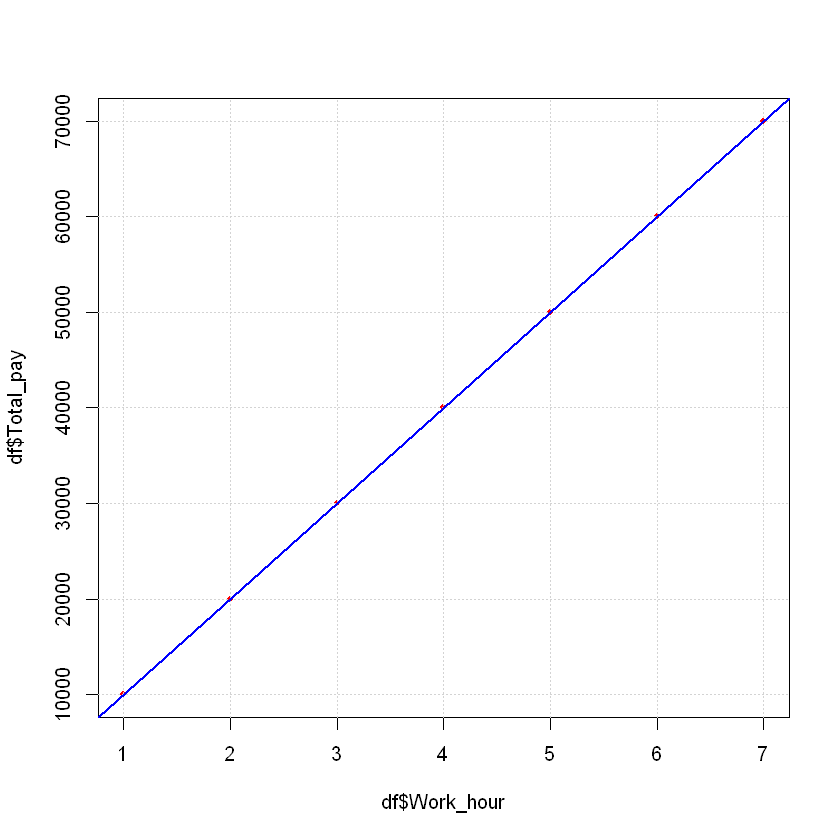

In [18]:
plot(data = df, df$Total_pay~df$Work_hour, pch=20, col='red')
grid()
abline(lr, col='blue',lwd=2)

안타와 홈런 변수를 활용한 회귀분석

In [19]:
df <- read.csv('r-ggagi-data/example_kbo2015.csv')

In [20]:
str(df)

'data.frame':	10 obs. of  26 variables:
 $ ranking: int  1 2 3 4 5 6 7 8 9 10
 $ team   : Factor w/ 10 levels "KIA","kt","LG",..: 9 6 7 4 8 5 10 2 3 1
 $ AVG    : num  0.3 0.3 0.291 0.288 0.277 0.276 0.27 0.27 0.259 0.256
 $ G      : int  102 102 99 101 104 99 102 102 103 100
 $ PA     : int  4091 4151 3950 3994 4082 3888 4037 3988 3984 3835
 $ AB     : int  3553 3620 3410 3485 3557 3373 3404 3498 3491 3362
 $ R      : int  634 658 570 591 545 476 504 466 458 469
 $ H      : int  1066 1085 991 1002 985 931 919 944 905 861
 $ X2B    : int  188 227 176 205 176 146 162 161 171 161
 $ X3B    : int  19 12 16 20 14 9 13 13 16 14
 $ HR     : int  127 155 98 110 130 92 82 87 83 95
 $ TB     : int  1673 1801 1493 1577 1579 1371 1353 1392 1357 1335
 $ RBI    : int  606 622 541 557 515 451 467 443 423 440
 $ SAC    : int  49 40 51 47 50 75 114 62 60 54
 $ SF     : int  44 37 45 36 23 17 27 26 29 23
 $ BB     : int  398 393 378 351 395 360 406 355 347 327
 $ IBB    : int  15 13 17 17 16 12 23 13 1

In [21]:
# 안타 H, 홈런 HR
df$H

[1] 1066 1085  991 1002  985  931  919  944  905  861

In [22]:
df$HR

[1] 127 155  98 110 130  92  82  87  83  95

In [23]:
#상관계수 (-1 ~ 1)
cor(df$H, df$HR)

[1] 0.8384116

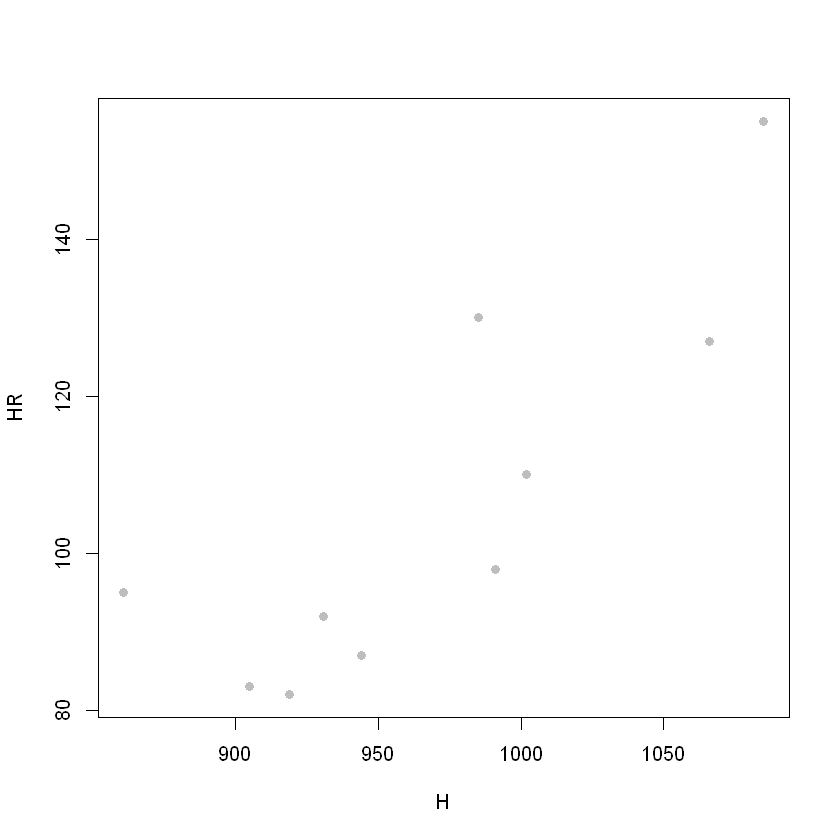

In [24]:
# 산점도
plot(HR~H, data = df, pch=20, col='grey', cex=1.5)

In [25]:
# 회귀모델 구하고 그리기 - 0.2871  안타 10번에 홈런 2.8번
lm <- lm(HR~H, data=df)
lm


Call:
lm(formula = HR ~ H, data = df)

Coefficients:
(Intercept)            H  
  -172.3105       0.2871  


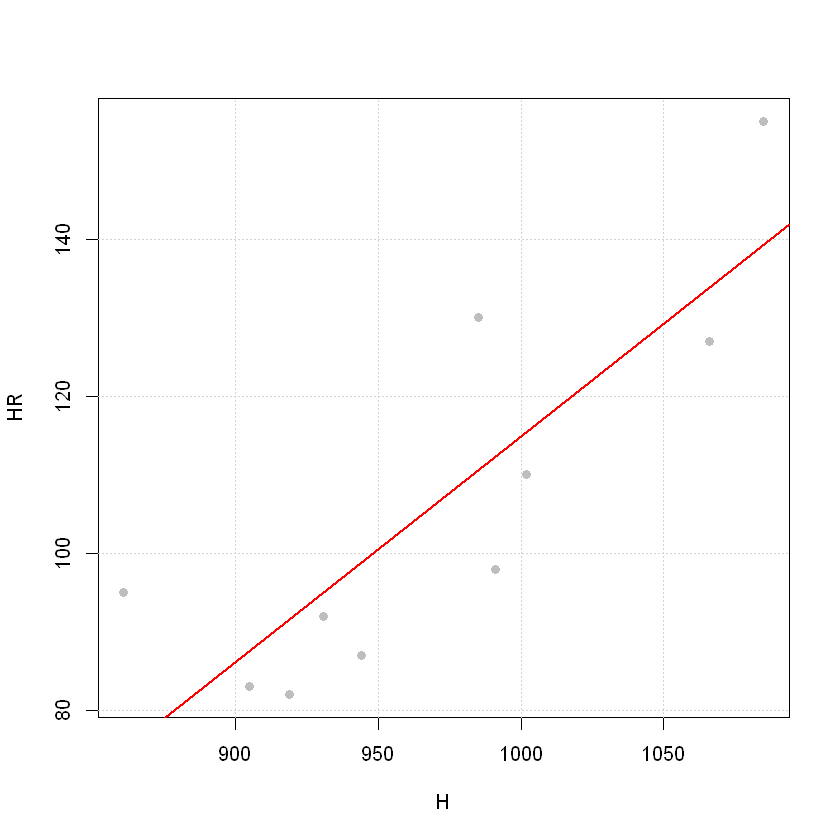

In [26]:
plot(HR~H, data = df, pch=20, col='grey', cex=1.5)
grid()
abline(lm, lwd=2, col='red')

In [27]:
# data load
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [28]:
cor(mtcars$hp, mtcars$mpg)

[1] -0.7761684

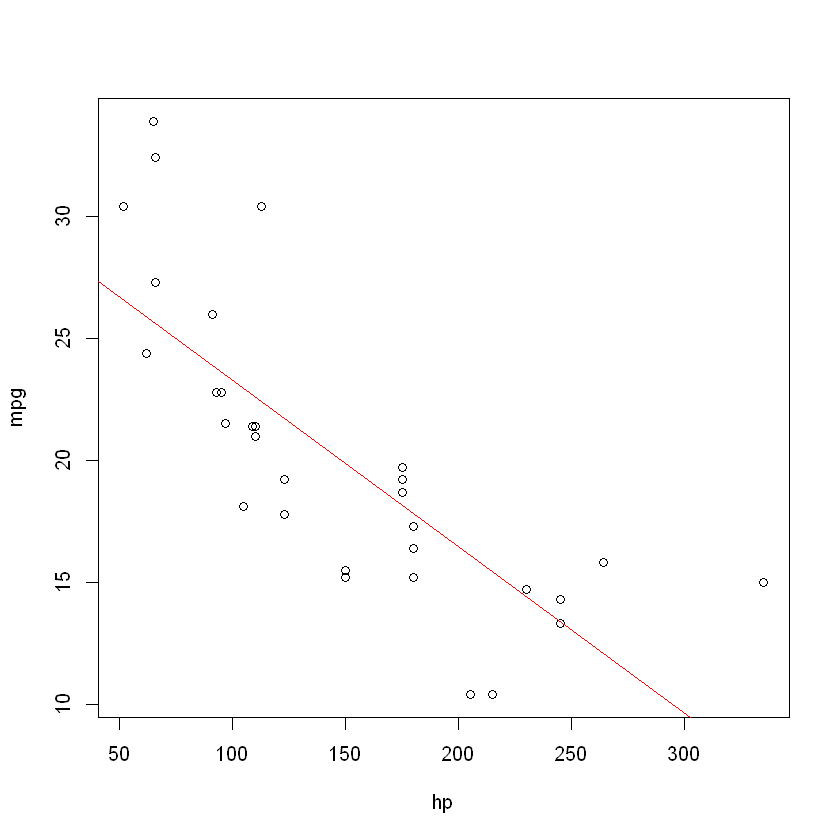

In [29]:
# 그래프 그리기
plot(mpg~hp, data = mtcars)
Lm <- lm(mpg~hp, data = mtcars)
abline(Lm, col='red')

In [30]:
lm
summary(lm)


Call:
lm(formula = HR ~ H, data = df)

Coefficients:
(Intercept)            H  
  -172.3105       0.2871  



Call:
lm(formula = HR ~ H, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.246  -8.874  -4.978  11.068  20.082 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -172.3105    64.0968  -2.688  0.02757 * 
H              0.2871     0.0660   4.351  0.00244 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14 on 8 degrees of freedom
Multiple R-squared:  0.7029,	Adjusted R-squared:  0.6658 
F-statistic: 18.93 on 1 and 8 DF,  p-value: 0.002442


In [31]:
confint(lm)

,2.5 %,97.5 %
(Intercept),-320.1180464,-24.502900
H,0.1349531,0.439328


In [32]:
df <- read.csv('r-ggagi-data//example_residuals_checking.csv')

In [33]:
head(df)

y1,x1,y2,x2
6.44,0.5,9.88,1.7
10.19,2.5,5.10,0.8
5.03,0.6,7.95,1.3
14.58,3.0,15.20,2.9
27.42,4.8,4.05,0.3
6.58,1.5,11.77,1.9


In [40]:
# x1, y1 관계 분석
lm.res1 <- lm(y1~x1, data = df)
lm.res1


Call:
lm(formula = y1 ~ x1, data = df)

Coefficients:
(Intercept)           x1  
      1.155        4.971  


In [41]:
lm.res2 <- lm(y2~x2, data = df)
lm.res2


Call:
lm(formula = y2 ~ x2, data = df)

Coefficients:
(Intercept)           x2  
      1.155        4.971  


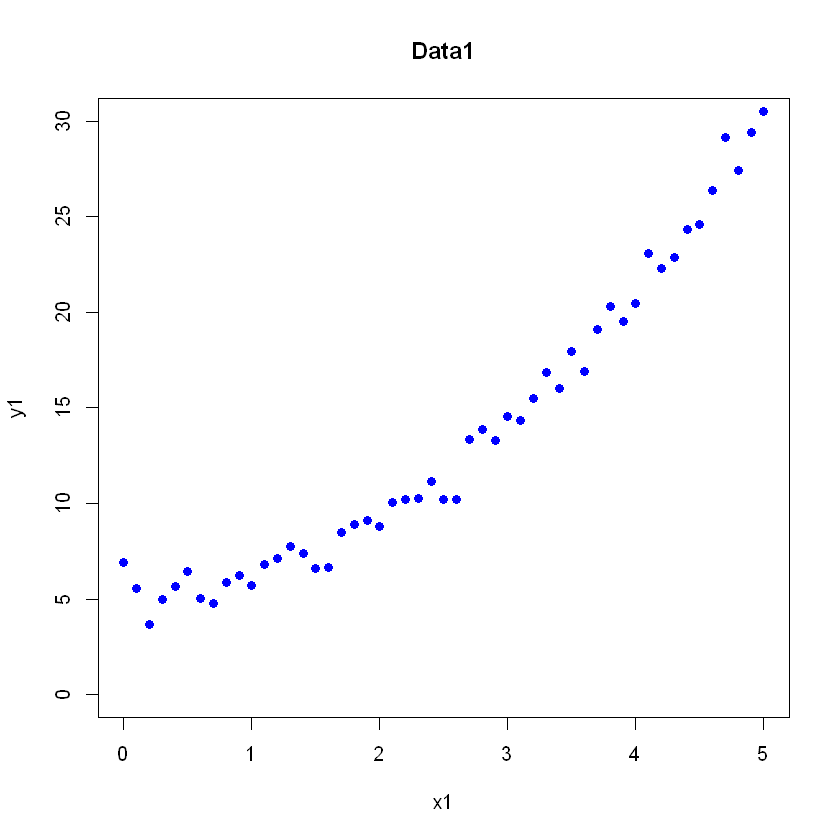

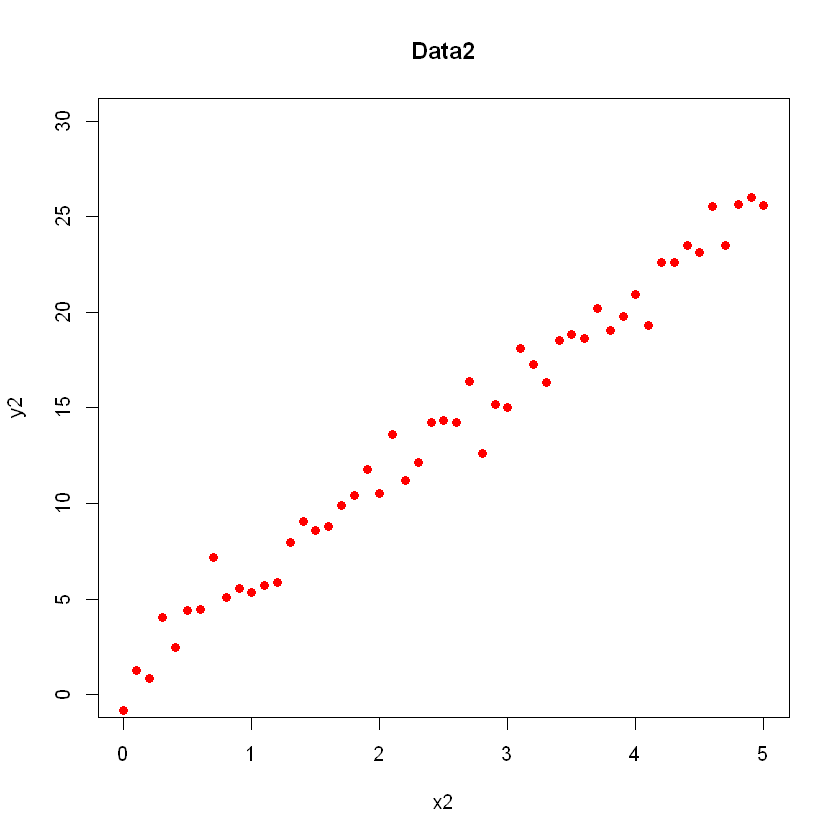

In [35]:
plot(y1~x1, df, pch = 20, cex=1.5, ylim = c(0,30), main = 'Data1',col='blue')
plot(y2~x2, df, pch = 20, cex=1.5, ylim = c(0,30), main = 'Data2',col='red')

ERROR: Error in abline(Lm.res1, col = "blue", lwd = 2): 객체 'Lm.res1'를 찾을 수 없습니다


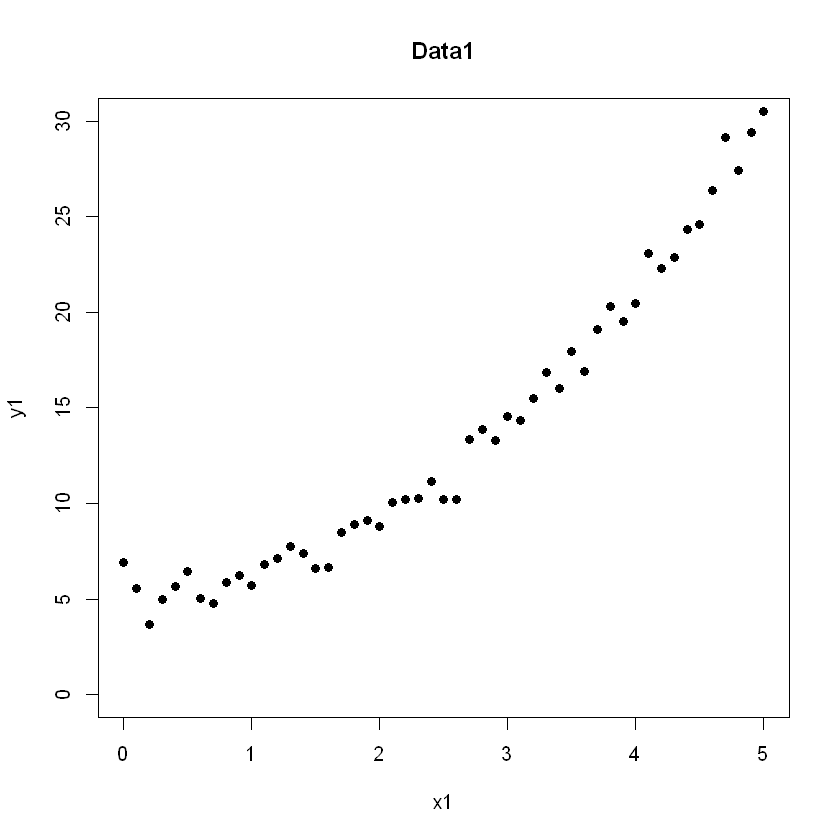

In [36]:
plot(y1~x1, df, pch = 20, cex=1.5, ylim = c(0,30), main = 'Data1')
abline(Lm.res1, col='blue', lwd=2)

plot(y2~x2, df, pch = 20, cex=1.5, ylim = c(0,30), main = 'Data2')
abline(Lm.res1, col='blue', lwd=2)

In [42]:
options(scipen = 999)
summary(lm.res1)


Call:
lm(formula = y1 ~ x1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8603 -1.5588 -0.4486  1.1981  5.7548 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)   1.1552     0.6071   1.903               0.063 .  
x1            4.9712     0.2093  23.756 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.2 on 49 degrees of freedom
Multiple R-squared:  0.9201,	Adjusted R-squared:  0.9185 
F-statistic: 564.3 on 1 and 49 DF,  p-value: < 0.00000000000000022


In [43]:
summary(lm.res2)


Call:
lm(formula = y2 ~ x2, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.43449 -0.72323 -0.03214  0.59951  2.54498 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)   1.1552     0.2925    3.95              0.00025 ***
x2            4.9712     0.1008   49.31 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.06 on 49 degrees of freedom
Multiple R-squared:  0.9802,	Adjusted R-squared:  0.9798 
F-statistic:  2431 on 1 and 49 DF,  p-value: < 0.00000000000000022


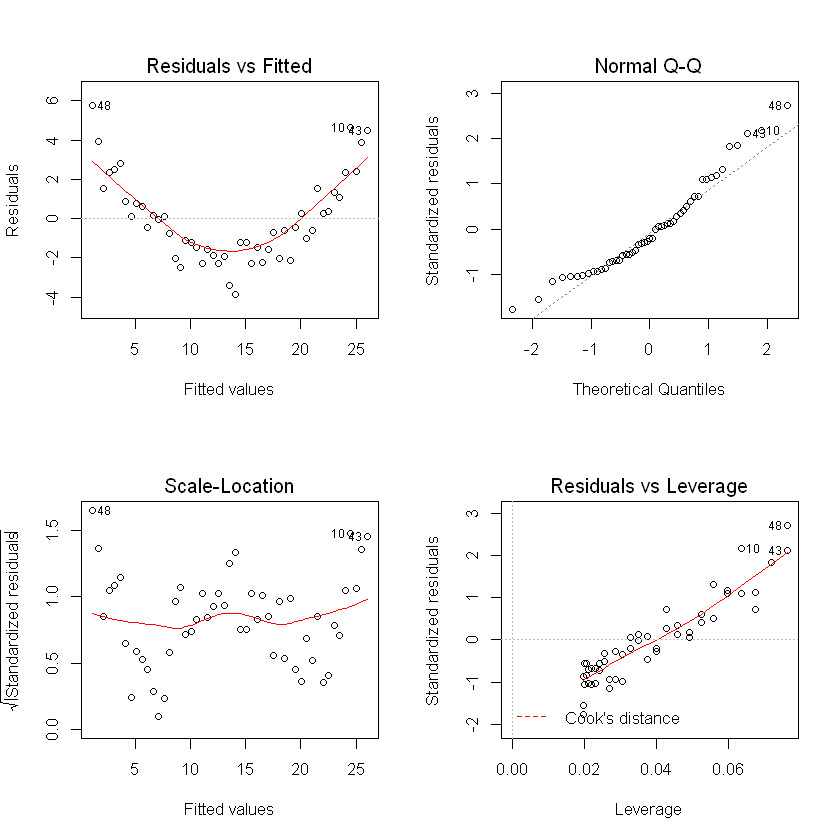

In [44]:
par(mfrow = c(2,2))
plot(lm.res1)

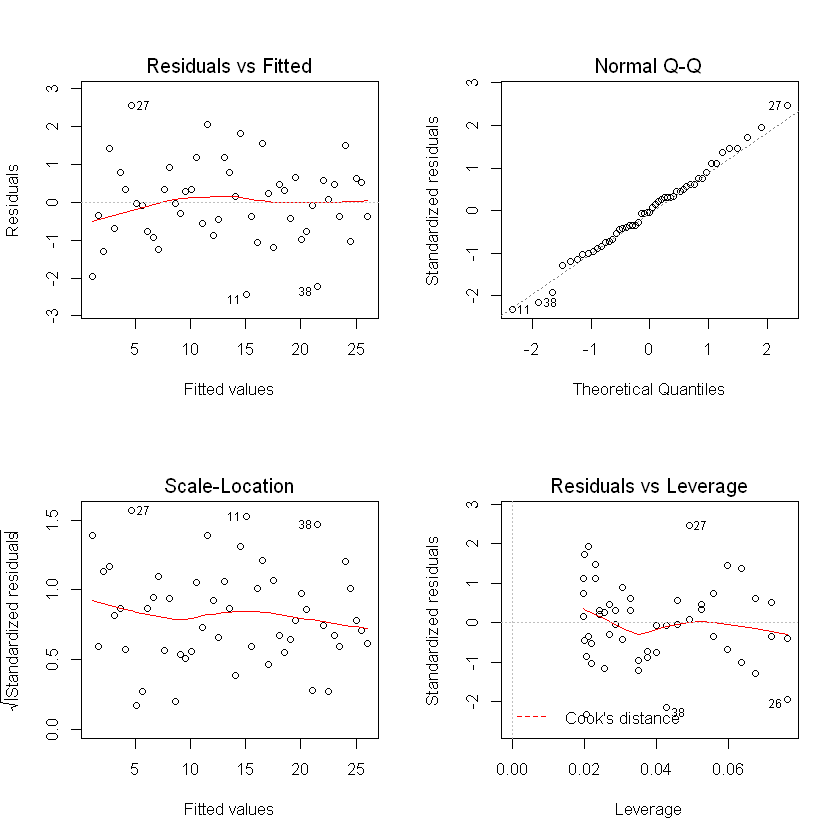

In [45]:
par(mfrow = c(2,2))
plot(lm.res2)

키와 몸무게 회귀모델 구하기

In [46]:
df <- read.csv('r-ggagi-data//example_studentlist.csv')

In [47]:
lm <- lm(df$height~df$weight, data=df)

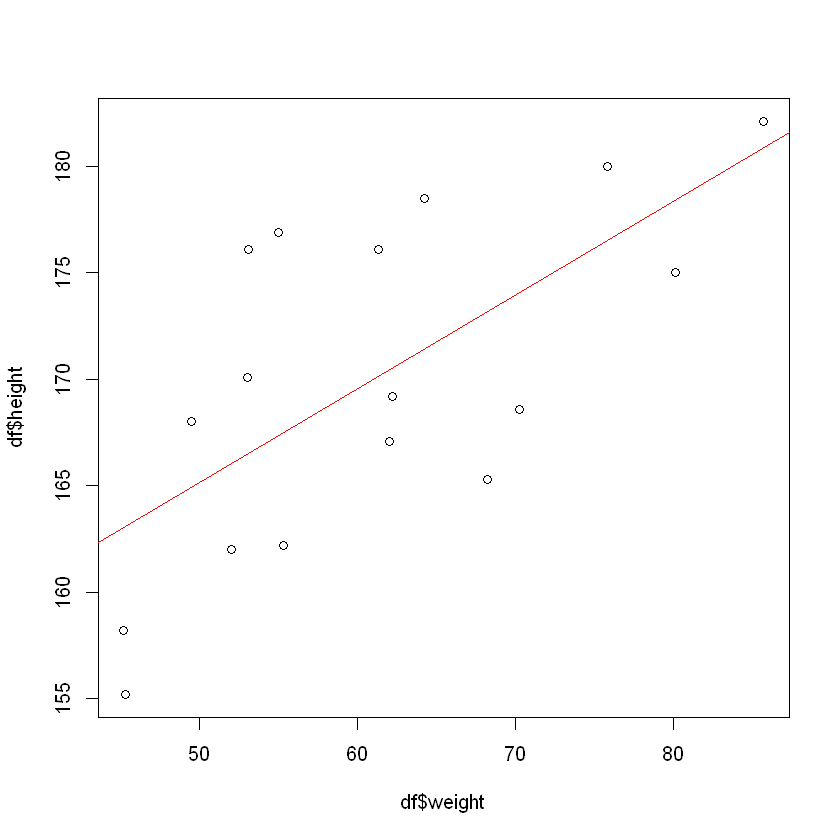

In [48]:
plot(df$height~df$weight, data=df)
abline(lm, col='red')

In [50]:
summary(lm)


Call:
lm(formula = df$height ~ df$weight, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-7.900 -4.856 -1.335  3.612  9.569 

Coefficients:
            Estimate Std. Error t value        Pr(>|t|)    
(Intercept) 143.1724     7.9440  18.023 0.0000000000142 ***
df$weight     0.4399     0.1278   3.441         0.00364 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.061 on 15 degrees of freedom
Multiple R-squared:  0.4411,	Adjusted R-squared:  0.4039 
F-statistic: 11.84 on 1 and 15 DF,  p-value: 0.003639


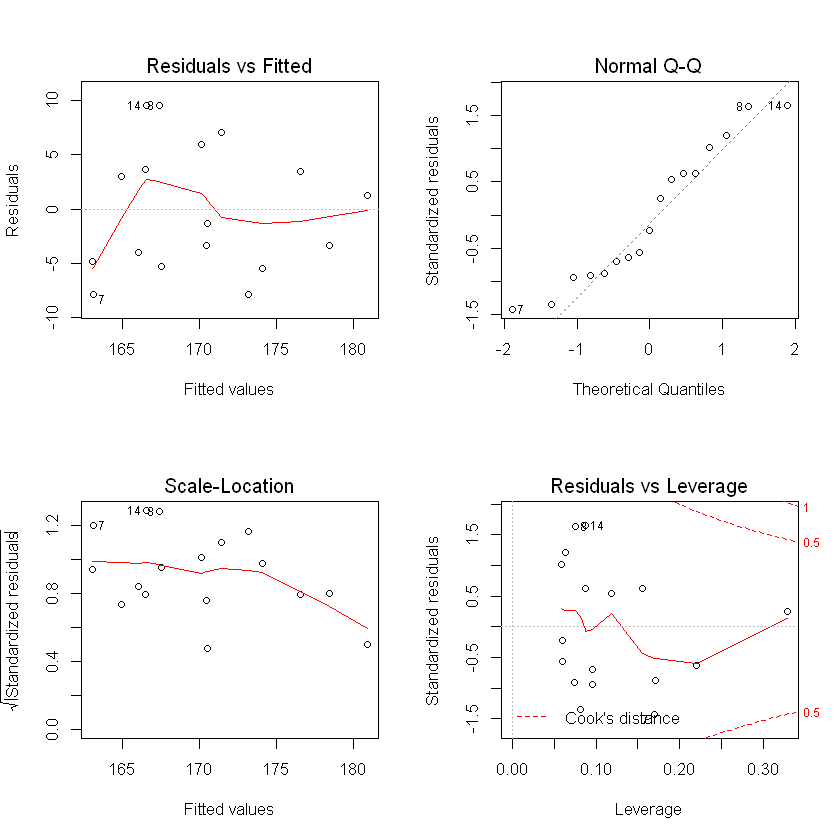

In [52]:
par(mfrow = c(2,2))
plot(lm)

타율에 영향을 미치는 변수 분석

In [53]:
df <- read.csv('r-ggagi-data//example_kbo2015_player.csv')

In [54]:
str(df)

'data.frame':	337 obs. of  26 variables:
 $ 순위  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 선수명: Factor w/ 331 levels "강경학","강동수",..: 197 110 320 13 196 29 240 201 158 71 ...
 $ 팀명  : Factor w/ 10 levels "KIA","kt","LG",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ AVG   : Factor w/ 142 levels "-","0","0.045",..: 136 133 128 121 117 116 113 107 102 98 ...
 $ G     : int  101 106 7 85 44 96 68 99 79 103 ...
 $ PA    : int  436 476 10 328 26 405 253 389 339 436 ...
 $ AB    : int  376 410 9 299 22 370 219 333 295 383 ...
 $ R     : int  82 100 0 59 17 53 40 52 62 68 ...
 $ H     : int  137 143 3 97 7 117 68 100 87 110 ...
 $ X2B   : int  35 29 0 22 2 21 10 22 21 28 ...
 $ X3B   : int  1 1 0 3 0 0 0 1 1 4 ...
 $ HR    : int  19 42 0 8 0 14 8 13 17 14 ...
 $ TB    : int  231 300 3 149 9 180 102 163 161 188 ...
 $ RBI   : int  84 111 2 40 3 65 21 67 53 57 ...
 $ SAC   : int  0 0 0 3 2 0 1 5 3 3 ...
 $ SF    : int  6 3 0 1 0 3 2 6 3 4 ...
 $ XBH   : int  55 72 0 33 2 35 18 36 39 46 ...
 $ GO    : int  97 70 2 73 6 

In [55]:
class(df$AVG )
df$AVG <- as.numeric(df$AVG) # 타율
df$GO.AO <- as.numeric(df$GO.AO) # 땅볼 대 플라이볼 비율
df$BB.K <- #볼넷 대 삼진 비율
df$P.PA <- as.numeric(df$P.PA) # 투구수/타석
df$ISOP <- as.numeric(df$ISOP) # 순장타율(장타율-타율)

[1] "factor"

In [56]:
# 홈런(HR) 과 다른 변수간 상관계수 
Cors <- cor(df$HR, 
            df[,5:length(df)], 
            use='pairwise.complete.obs') # 피어슨 알고리즘으로 결측치 처리
Cors

G,PA,AB,R,H,X2B,X3B,HR,TB,RBI,...,XBH,GO,AO,GO.AO,GW.RBI,BB.K,P.PA,ISOP,XR,GPA
0.6573121,0.7607232,0.7519703,0.8012273,0.7815465,0.7756991,0.3089791,1,0.8828075,0.9217014,...,0.9190164,0.6096195,0.7477335,0.06866405,0.7889489,0.2734712,0.2734712,0.7544387,0.8815765,0.5505212


In [57]:
Cors <- Cors[,order(Cors)]
Cors

SAC      GO.AO       BB.K       P.PA        X3B        GPA         GO 
0.02882778 0.06866405 0.27347118 0.27347118 0.30897909 0.55052123 0.60961949 
         G         SF         AO         AB       ISOP         PA        X2B 
0.65731209 0.67663588 0.74773350 0.75197032 0.75443866 0.76072321 0.77569907 
         H     GW.RBI          R         XR         TB        XBH        RBI 
0.78154650 0.78894892 0.80122734 0.88157647 0.88280745 0.91901637 0.92170137 
        HR 
1.00000000

In [58]:
# 뜬공 AO 0.747733499475882 분석 해보기
# 홈런과 뜬공 데이터 값 0 제거
df$HR[df$HR == 0] <- NA
df$HR[df$AO == 0] <- NA
df <- na.omit(df)

In [59]:
lm <- lm(HR~AO, data = df)
lm


Call:
lm(formula = HR ~ AO, data = df)

Coefficients:
(Intercept)           AO  
    -0.5244       0.1541  


In [60]:
summary(lm)


Call:
lm(formula = HR ~ AO, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2728  -2.8553  -0.4085   2.2129  31.1208 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) -0.52444    0.90894  -0.577               0.565    
AO           0.15410    0.01502  10.260 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.932 on 148 degrees of freedom
Multiple R-squared:  0.4156,	Adjusted R-squared:  0.4117 
F-statistic: 105.3 on 1 and 148 DF,  p-value: < 0.00000000000000022


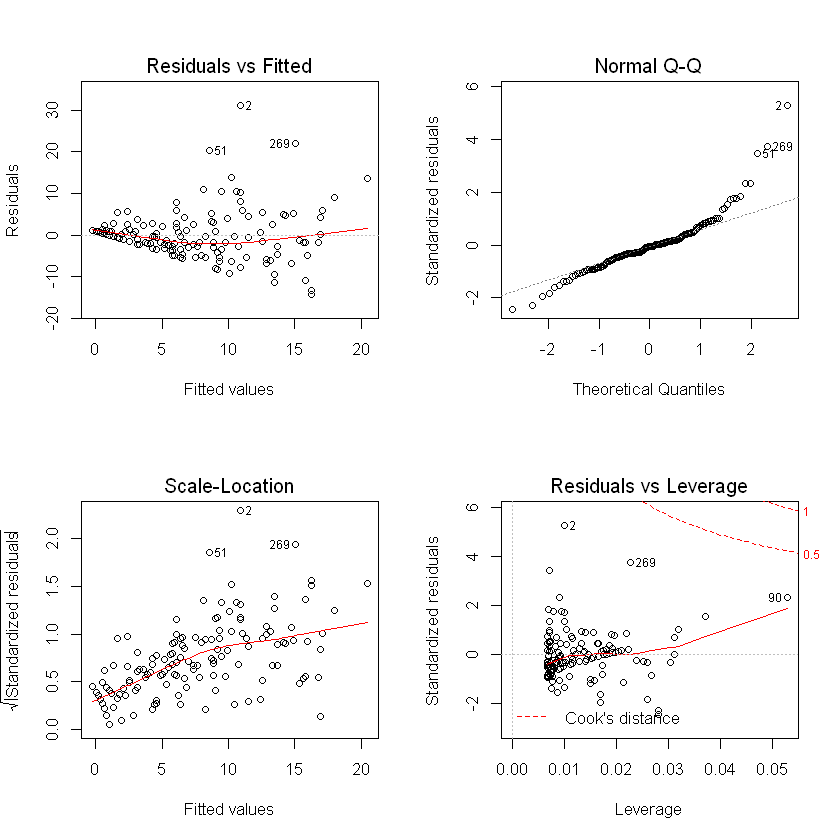

In [61]:
# 잔차 그래프 확인
# 1번 0 주위로 일정한 패턴 없이 분산 - 적합
# 2번 Q-Q 선에 많은 점들이 모여 있음 - 정규분포 적합
# 3,4번 특이한 사항이 없으 - 적합

par(mfrow = c(2,2))
plot(lm)

마력(hp)에 실린더수(cyl) + 차체무게(wt) 영향 분석

In [62]:
df <- mtcars
str(df)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [63]:
lm_t1 <- lm(hp~cyl, data=df)
lm_t2 <- lm(hp~wt, data=df)

In [64]:
lm_t1
lm_t2


Call:
lm(formula = hp ~ cyl, data = df)

Coefficients:
(Intercept)          cyl  
     -51.05        31.96  



Call:
lm(formula = hp ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     -1.821       46.160  


In [65]:
# 독립변수 추가
lm <- lm(hp~cyl+wt, data = df)

In [66]:
lm


Call:
lm(formula = hp ~ cyl + wt, data = df)

Coefficients:
(Intercept)          cyl           wt  
     -51.81        31.39         1.33  


In [67]:
# hp = -51.81 + 31.93 * x1 + 1.33 * x2
summary(lm)


Call:
lm(formula = hp ~ cyl + wt, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-53.98 -25.75 -10.93  20.88 130.95 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  -51.806     26.231  -1.975    0.0579 .  
cyl           31.388      6.343   4.949 0.0000293 ***
wt             1.330     11.577   0.115    0.9093    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.27 on 29 degrees of freedom
Multiple R-squared:  0.6931,	Adjusted R-squared:  0.6719 
F-statistic: 32.75 on 2 and 29 DF,  p-value: 0.00000003641


지구 최고온도에 영향을 미치는 독립변수로 다중회귀분석하기

In [68]:
head(airquality, 5)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5


In [69]:
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


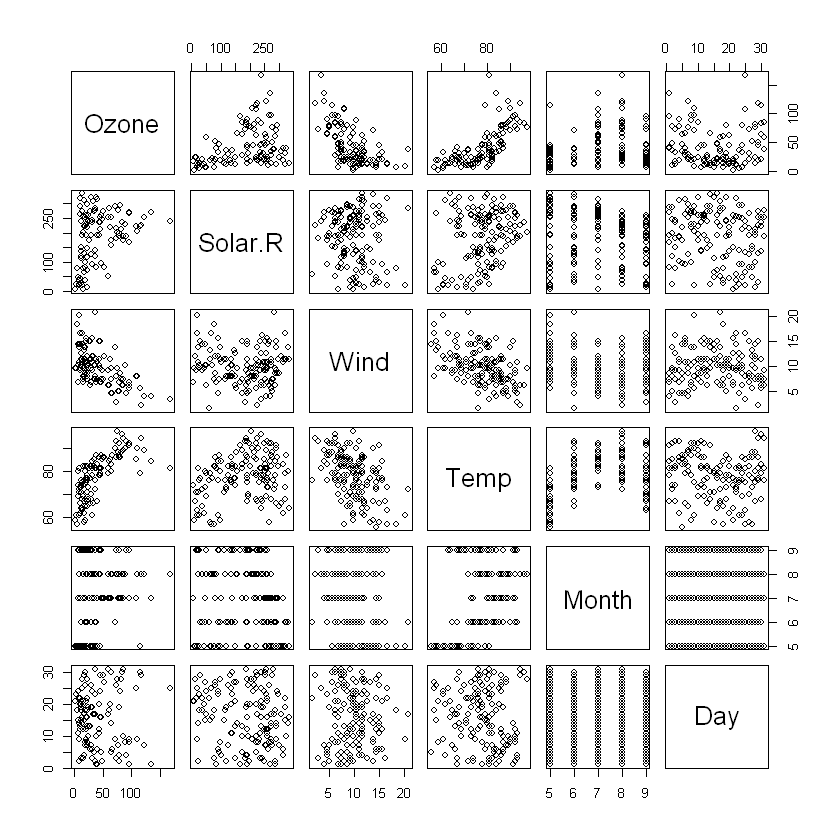

In [70]:
plot(airquality)

In [71]:
df = airquality

In [72]:
lm <- lm(df$Temp~df$Ozone+df$Solar.R+df$Wind, data=df)
lm


Call:
lm(formula = df$Temp ~ df$Ozone + df$Solar.R + df$Wind, data = df)

Coefficients:
(Intercept)     df$Ozone   df$Solar.R      df$Wind  
  72.418579     0.171966     0.007276    -0.322945  


In [73]:
# y = 72.418579 + 0.171966 * x1 + 0.007276 * x2 -0.322945 * x3

In [74]:
summary(lm)


Call:
lm(formula = df$Temp ~ df$Ozone + df$Solar.R + df$Wind, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.942  -4.996   1.283   4.434  13.168 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 72.418579   3.215525  22.522 < 0.0000000000000002 ***
df$Ozone     0.171966   0.026390   6.516        0.00000000242 ***
df$Solar.R   0.007276   0.007678   0.948                0.345    
df$Wind     -0.322945   0.233264  -1.384                0.169    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.834 on 107 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.4999,	Adjusted R-squared:  0.4858 
F-statistic: 35.65 on 3 and 107 DF,  p-value: 0.0000000000000004729


2015 KBO 야구 데이터 다중선형회귀분석¶

In [77]:
df <- read.csv('r-ggagi-data//example_kbo2015_player.csv',stringsAsFactors = F, na='-')
str(df)

'data.frame':	337 obs. of  26 variables:
 $ 순위  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 선수명: chr  "유한준" "박병호" "홍성갑" "고종욱" ...
 $ 팀명  : chr  "넥센" "넥센" "넥센" "넥센" ...
 $ AVG   : num  0.364 0.349 0.333 0.324 0.318 0.316 0.311 0.3 0.295 0.287 ...
 $ G     : int  101 106 7 85 44 96 68 99 79 103 ...
 $ PA    : int  436 476 10 328 26 405 253 389 339 436 ...
 $ AB    : int  376 410 9 299 22 370 219 333 295 383 ...
 $ R     : int  82 100 0 59 17 53 40 52 62 68 ...
 $ H     : int  137 143 3 97 7 117 68 100 87 110 ...
 $ X2B   : int  35 29 0 22 2 21 10 22 21 28 ...
 $ X3B   : int  1 1 0 3 0 0 0 1 1 4 ...
 $ HR    : int  19 42 0 8 0 14 8 13 17 14 ...
 $ TB    : int  231 300 3 149 9 180 102 163 161 188 ...
 $ RBI   : int  84 111 2 40 3 65 21 67 53 57 ...
 $ SAC   : int  0 0 0 3 2 0 1 5 3 3 ...
 $ SF    : int  6 3 0 1 0 3 2 6 3 4 ...
 $ XBH   : int  55 72 0 33 2 35 18 36 39 46 ...
 $ GO    : int  97 70 2 73 6 95 60 96 39 80 ...
 $ AO    : int  95 74 0 67 2 105 57 84 75 106 ...
 $ GO.AO : num  1.02 0.95 NA

In [78]:
df$AVG <- as.numeric(df$AVG) # 타율
df$GO.AO <- as.numeric(df$GO.AO) # 땅볼 대 플라이볼 비율
df$BB.K <- #볼넷 대 삼진 비율
df$P.PA <- as.numeric(df$P.PA) # 투구수/타석
df$ISOP <- as.numeric(df$ISOP) # 순장타율(장타율-타율)

In [79]:
Cors <- cor(df$HR, 
            df[,5:length(df)], 
            use='pairwise.complete.obs') # 피어슨 알고리즘으로 결측치 처리
Cors

G,PA,AB,R,H,X2B,X3B,HR,TB,RBI,...,XBH,GO,AO,GO.AO,GW.RBI,BB.K,P.PA,ISOP,XR,GPA
0.6573121,0.7607232,0.7519703,0.8012273,0.7815465,0.7756991,0.3089791,1,0.8828075,0.9217014,...,0.9190164,0.6096195,0.7477335,-0.1618067,0.7889489,0.03248409,0.03248409,0.7813991,0.8815765,0.5505212


In [80]:
Cors <- Cors[,order(Cors)]
Cors

GO.AO         SAC        BB.K        P.PA         X3B         GPA 
-0.16180671  0.02882778  0.03248409  0.03248409  0.30897909  0.55052123 
         GO           G          SF          AO          AB          PA 
 0.60961949  0.65731209  0.67663588  0.74773350  0.75197032  0.76072321 
        X2B        ISOP           H      GW.RBI           R          XR 
 0.77569907  0.78139909  0.78154650  0.78894892  0.80122734  0.88157647 
         TB         XBH         RBI          HR 
 0.88280745  0.91901637  0.92170137  1.00000000

In [81]:
df$HR[df$HR == 0] <- NA
df$RBI[df$RBI == 0] <- NA # 타점
df$XBH[df$XBH == 0] <- NA # 장타
df$TB[df$TB == 0] <- NA # 루타
df$XR[df$XR == 0] <- NA # 추정득점 => 득점이되는 이벤트가 많아서 선형가중한것
df$R[df$R == 0] <- NA # 득점

In [82]:
lm <- lm(HR ~ RBI + XBH + TB + XR + R, data = df)
lm


Call:
lm(formula = HR ~ RBI + XBH + TB + XR + R, data = df)

Coefficients:
(Intercept)          RBI          XBH           TB           XR            R  
   -0.43714      0.15582      0.53837     -0.09486      0.15782     -0.12392  


In [83]:
summary(lm)


Call:
lm(formula = HR ~ RBI + XBH + TB + XR + R, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1729 -1.5779  0.1418  1.3689 10.7785 

Coefficients:
            Estimate Std. Error t value         Pr(>|t|)    
(Intercept) -0.43714    0.45244  -0.966          0.33557    
RBI          0.15582    0.03477   4.482 0.00001497787021 ***
XBH          0.53837    0.07196   7.482 0.00000000000665 ***
TB          -0.09486    0.03033  -3.128          0.00213 ** 
XR           0.15782    0.06328   2.494          0.01377 *  
R           -0.12392    0.03806  -3.256          0.00141 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.803 on 144 degrees of freedom
  (187 observations deleted due to missingness)
Multiple R-squared:  0.873,	Adjusted R-squared:  0.8686 
F-statistic:   198 on 5 and 144 DF,  p-value: < 0.00000000000000022


In [84]:
df_kbo <- read.csv('r-ggagi-data//example_kbo2015.csv')

In [85]:
head(df_kbo)

ranking,team,AVG,G,PA,AB,R,H,X2B,X3B,...,IBB,HBP,SO,GDP,SLG,OBP,OPS,MH,RISP,PH.BA
1,삼성,0.300,102,4091,3553,634,1066,188,19,...,15,47,650,78,0.471,0.374,0.845,101,0.300,0.216
2,넥센,0.300,102,4151,3620,658,1085,227,12,...,13,61,815,79,0.498,0.374,0.872,100,0.294,0.268
3,두산,0.291,99,3950,3410,570,991,176,16,...,17,66,544,95,0.438,0.368,0.806,98,0.284,0.262
4,NC,0.288,101,3994,3485,591,1002,205,20,...,17,74,717,65,0.453,0.362,0.815,101,0.296,0.274
5,롯데,0.277,104,4082,3557,545,985,176,14,...,16,57,866,105,0.444,0.356,0.800,104,0.272,0.190
6,SK,0.276,99,3888,3373,476,931,146,9,...,12,63,720,73,0.406,0.355,0.761,99,0.277,0.236


In [88]:
lm <- lm(HR~TB, data = df_kbo)
lm


Call:
lm(formula = HR ~ TB, data = df_kbo)

Coefficients:
(Intercept)           TB  
  -109.2696       0.1441  


In [89]:
summary(lm)


Call:
lm(formula = HR ~ TB, data = df_kbo)

Residuals:
   Min     1Q Median     3Q    Max 
-7.991 -4.702 -3.498  4.471 11.884 

Coefficients:
              Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -109.26964   24.92619  -4.384   0.00234 ** 
TB             0.14411    0.01661   8.677 0.0000242 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.963 on 8 degrees of freedom
Multiple R-squared:  0.9039,	Adjusted R-squared:  0.8919 
F-statistic: 75.28 on 1 and 8 DF,  p-value: 0.00002423


In [90]:
p <- predict(lm)
p

1         2         3         4         5         6         7         8 
131.82527 150.27126 105.88559 117.99077 118.27899  88.30425  85.71028  91.33055 
        9        10 
 86.28672  83.11632

In [91]:
c(df_kbo$HR[1], p[1])
c(df_kbo$HR[2], p[2])

1 
127.0000 131.8253

2 
155.0000 150.2713

In [92]:
com <- data.frame(team=df_kbo$team, HR=df_kbo$HR, fittedHR=round(p), fittedHR=p)
com

team,HR,fittedHR,fittedHR.1
삼성,127,132,131.82527
넥센,155,150,150.27126
두산,98,106,105.88559
NC,110,118,117.99077
롯데,130,118,118.27899
SK,92,88,88.30425
한화,82,86,85.71028
kt,87,91,91.33055
LG,83,86,86.28672
KIA,95,83,83.11632


In [93]:
newTeam <- data.frame(TB=1600)
predict(lm, newTeam)

1 
121.3053